# Opencv

## Loading libraries:

In [114]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
print(cv2.__version__)

4.6.0


## coonect drive:

In [117]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [122]:
pwd

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-122-d3dc51b95a25>", line 1, in <module>
    get_ipython().run_line_magic('pwd', '')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2314, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-84>", line 2, in pwd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 287, in pwd
    return os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2040, in sho

OSError: ignored

In [123]:
!cd /content/drive/MyDrive/Colab Notebook

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
/bin/bash: line 0: cd: too many arguments


In [124]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pwd: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


In [ ]:
ls

1.Basic_code.ipynb  Distracted_driver/  Opencv.ipynb  Style_GAN/
Buffalo_YOLOv3/     dog.jpg             Plate/        U-Net/


## import image:

In [125]:
img_path = '/content/drive/MyDrive/Colab Notebooks/dog.jpg'
img = cv2.imread(img_path, 1)

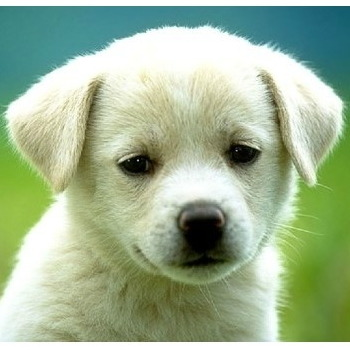

In [126]:
#cv2.imshow("image", img)
cv2_imshow(img)

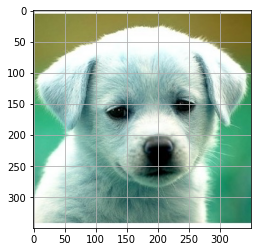

In [127]:
plt.imshow(img, vmin=0, vmax=255)
plt.grid(None)
plt.show()

In [128]:
img.shape

(350, 350, 3)

## image resizing:

Original Dimensions :  (350, 350, 3)
Resized Dimensions :  (210, 210, 3)


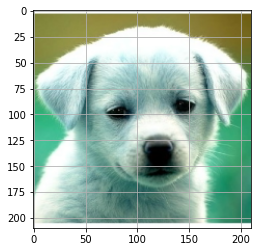

In [129]:
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
 
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

plt.imshow(resized, vmin=0, vmax=255)
plt.grid(None)
plt.show()

Original Dimensions :  (350, 350, 3)
Resized Dimensions :  (256, 256, 3)


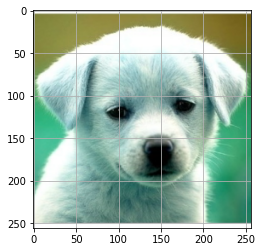

In [130]:
print('Original Dimensions : ',img.shape)
 
width = 256
height = 256
dim = (width, height)
 
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

plt.imshow(resized, vmin=0, vmax=255)
plt.grid(None)
plt.show()

## RGB to Grayscale:

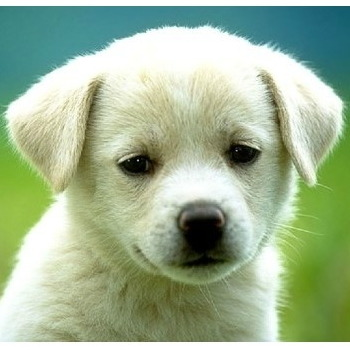

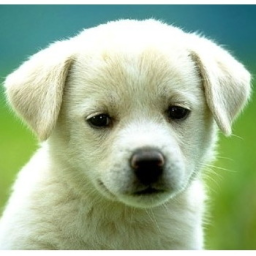

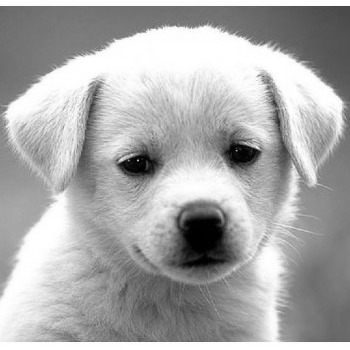

In [131]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(resized)
cv2_imshow(gray_image)


## Save Image:

In [133]:
# Filename
filename = '/content/1.png'

# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, resized)

True

## Data augmantation:

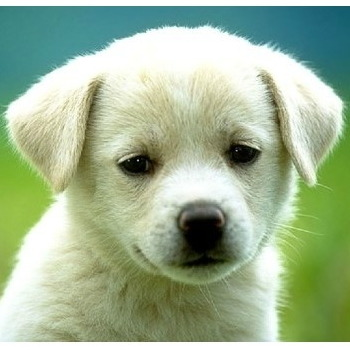

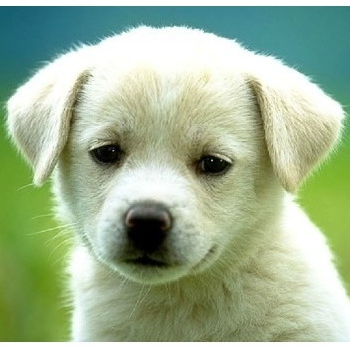

In [134]:
image_flip = cv2.flip(img, 1)  #(0, 1 , -1)
cv2_imshow(img)
cv2_imshow(image_flip)

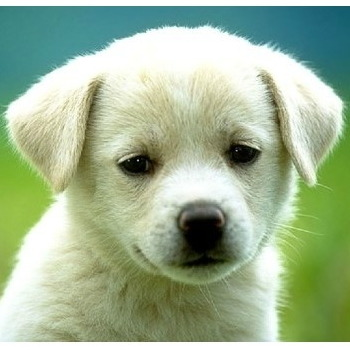

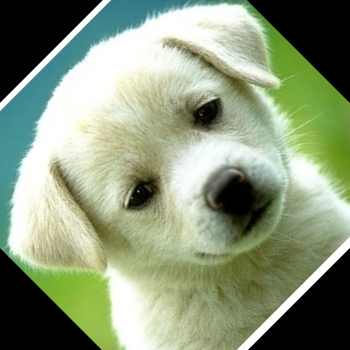

In [135]:
# dividing height and width by 2 to get the center of the image
height, width = img.shape[:2]

# get the center coordinates of the image to create the 2D rotation matrix
center = (width/2, height/2)

# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))

cv2_imshow(img)
cv2_imshow(rotated_image)
 


## Image Blurring:

OpenCV-Python is a library of Python bindings designed to solve computer vision problems. cv2.blur() method is used to blur an image using the normalized box filter. The function smooths an image using the kernel which is represented as:

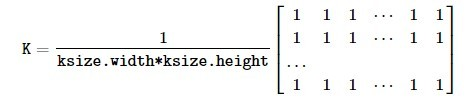

Syntax: cv2.blur(src, ksize[, dst[, anchor[, borderType]]])


Parameters:


src: It is the image whose is to be blurred.


ksize: A tuple representing the blurring kernel size.


dst: It is the output image of the same size and type as src.


anchor: It is a variable of type integer representing anchor point and it’s 

default value Point is (-1, -1) which means that the anchor is at the kernel center.


borderType: It depicts what kind of border to be added. It is defined by flags like cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, etc


Return Value: It returns an image.

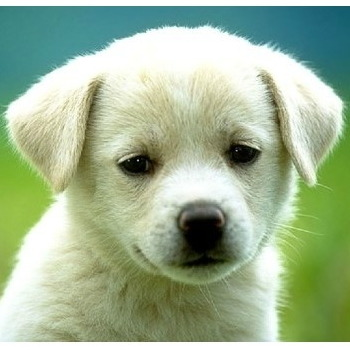

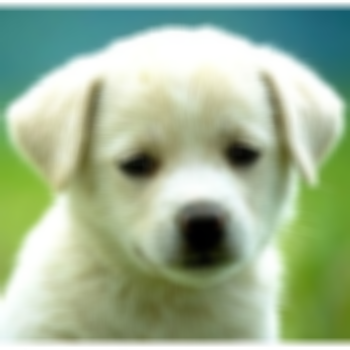

In [136]:
# ksize
ksize = (10, 10)
  
# Using cv2.blur() method 
image_blur = cv2.blur(img, ksize) 

cv2_imshow(img)
cv2_imshow(image_blur)

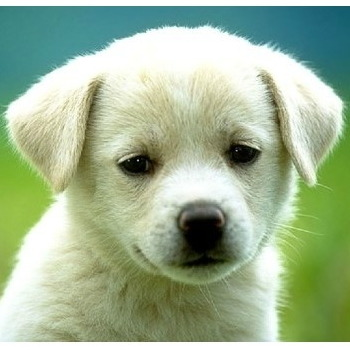

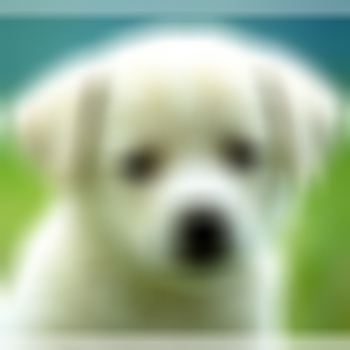

In [137]:
# ksize
ksize = (30, 30)
  
# Using cv2.blur() method 
image_blur = cv2.blur(img, ksize) 

cv2_imshow(img)
cv2_imshow(image_blur)

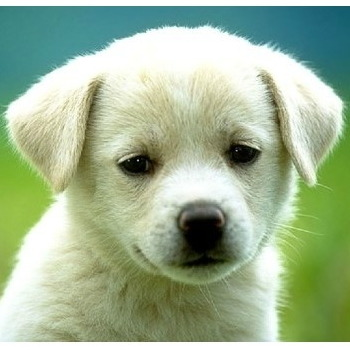

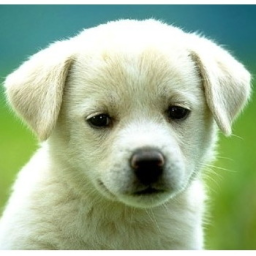

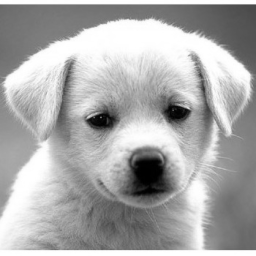

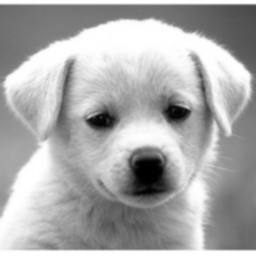

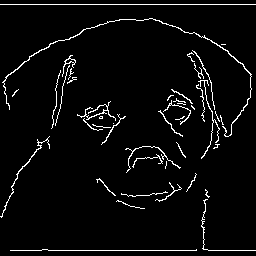

In [139]:
img_path = '/content/drive/MyDrive/Colab Notebooks/dog.jpg'
img = cv2.imread(img_path, 1)
# resize image
resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)

# Convert to graycsale
img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)

cv2_imshow(img)
cv2_imshow(resized)
cv2_imshow(img_gray)
cv2_imshow(img_blur)
cv2_imshow(edges)

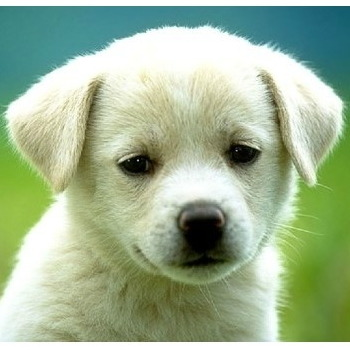

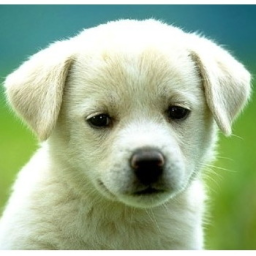

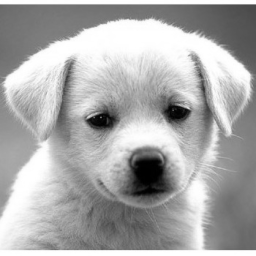

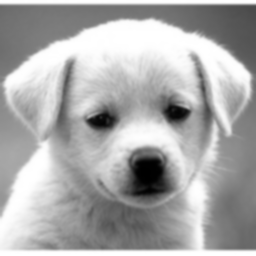

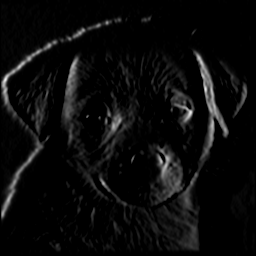

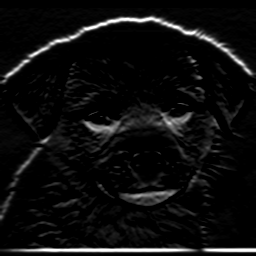

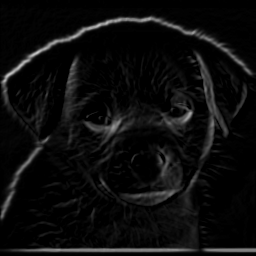

In [140]:
img_path = '/content/drive/MyDrive/Colab Notebooks/dog.jpg'
img = cv2.imread(img_path, 1)
# resize image
resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)

# Convert to graycsale
img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)



#Sobel edge detection
edge_sobel_x = cv2.Sobel(img_blur, -1, 1, 0, ksize=3)
edge_sobel_y = cv2.Sobel(img_blur, -1, 0, 1, ksize=3)

edge_sobel_combined = cv2.addWeighted(edge_sobel_x, 0.5, edge_sobel_y, 0.5, 0)

cv2_imshow(img)
cv2_imshow(resized)
cv2_imshow(img_gray)
cv2_imshow(img_blur)
cv2_imshow(edge_sobel_x)
cv2_imshow(edge_sobel_y)
cv2_imshow(edge_sobel_combined)

## Step 1: Import required libraries. 

In [141]:

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Step 2: We will read the image by using “cv2.imread(image-name)” command & then convert this image into grayscale image using “cv2.cvtColor(image-name, cv2.COLOR_BGR2GRAY)” command.

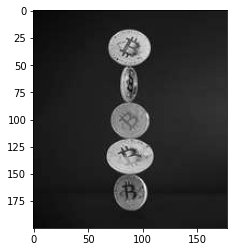

In [142]:
img_path = '/content/drive/MyDrive/Colab Notebooks/coins.jpg'
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

## Step 3: For counting, we have to detect the edges but before detecting the edges we have to make the image blur to avoid the noises. Use “cv2.GaussianBlur(image-name, Kernal size, std. deviation)”. 

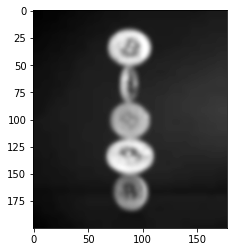

In [143]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')

## Step 4:  Now we will detect edges using a canny algorithm, 2nd & 3rd parameters in cv2.canny() function are threshold values. a value between 30 & 150 are consider as an edge for this image.

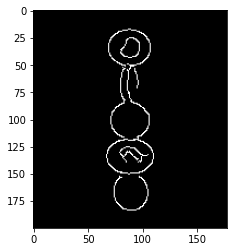

In [144]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

## Step 5: We can see that edges are not connected. We need to connect the edges, have to make more thiker & visible. 

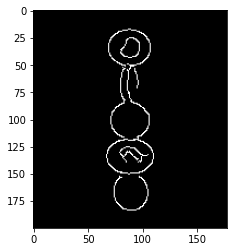

In [145]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

## Step 6: Now we have to calculate the contour in the image & convert the image into RGB from BGR & then draw the contours.

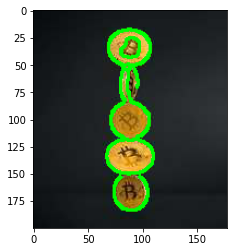

In [146]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)

## Step 7: Printing the result

In [147]:
print("coins in the image : ", len(cnt))

coins in the image :  5


coins in the image :  4


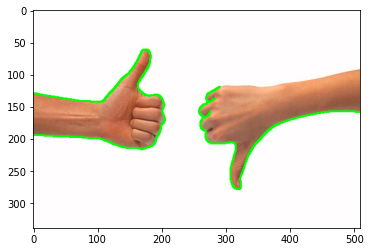

In [150]:

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/thumbs_up_down.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 100, 200, 3)
dilated = cv2.dilate(canny, (1, 1), iterations=0)
 
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)
print("coins in the image : ", len(cnt))

## example 2

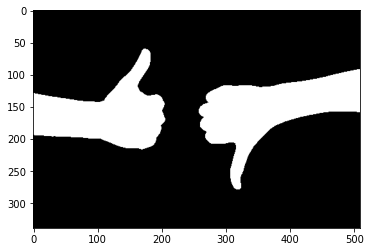

In [157]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/thumbs_up_down.jpg')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# create a binary thresholded image 
# cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
 
# show it
plt.imshow(binary, cmap="gray")
plt.show()

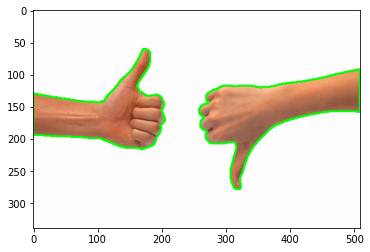

objects in the image :  2


In [158]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# show the image with the drawn contours
plt.imshow(image)
plt.show()
print("objects in the image : ", len(contours))

objects in the image :  6


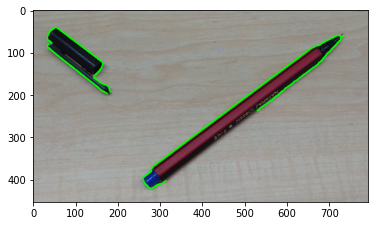

In [159]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/pen.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 100, 200, 3)
dilated = cv2.dilate(canny, (1, 1), iterations=0)
 
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)
print("objects in the image : ", len(cnt))


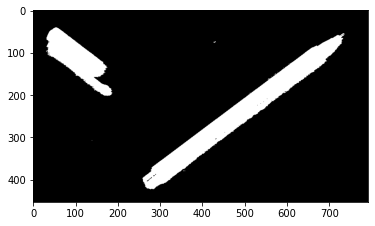

In [161]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/pen.png')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# create a binary thresholded image 
# cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
 
# show it
plt.imshow(binary, cmap="gray")
plt.show()

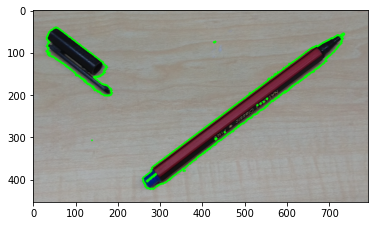

objects in the image :  35


In [162]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

# show the image with the drawn contours
plt.imshow(image)
plt.show()
print("objects in the image : ", len(contours))

In [ ]:
image.shape

(453, 792, 3)

## Contour Area:

In [165]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/thumbs_up_down.jpg')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# create a binary thresholded image 
# cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
 
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print("objects in the image : ", len(contours))

cnt = contours[0]
area = cv2.contourArea(cnt)  # area
perimeter = cv2.arcLength(cnt,True) # perimeter

print (area)
print (perimeter)

objects in the image :  2
18177.5
818.1147847175598
